<a href="https://colab.research.google.com/github/javilledo/machine-learning/blob/master/notebooks/t02_03_data_cleaning_agrupacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AGREGACIÓN DE DATOS POR CATEGORÍA

In [43]:
import numpy as np
import pandas as pd

In [44]:
gender = ['Male', 'Female']
economic_status = ['Poor', 'Middle Class', 'Rich']

In [45]:
n = 500

gender_data = []
economic_status_data = []

for i in range(0,n):
  gender_data.append(np.random.choice(gender))
  economic_status_data.append(np.random.choice(economic_status))

In [46]:
gender_data[1:10]

['Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male']

In [47]:
economic_status_data[1:10]

['Middle Class',
 'Rich',
 'Poor',
 'Rich',
 'Middle Class',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Middle Class']

In [48]:
# N(m,s) = m + s * N(0,1)
height_data = 160 + 30 * np.random.randn(n)
weight_data = 65 + 25 * np.random.randn(n)
age_data = 30 + 12 * np.random.randn(n)
income_data = 18000 + 3500 * np.random.randn(n)

In [49]:
data = pd.DataFrame(
    {
        'Gender': gender_data,
        'Economic Status': economic_status_data,
        'Height': height_data,
        'Weight': weight_data,
        'Age': age_data,
        'Income': income_data      
    }
)
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,132.437324,103.184672,35.036792,15066.122922
1,Male,Middle Class,125.453175,93.384280,32.901544,21102.861399
2,Female,Rich,225.014303,55.029533,25.388403,17287.848139
3,Male,Poor,120.710759,95.048062,33.156571,16129.378758
4,Male,Rich,192.784990,24.646342,16.407727,20958.700342


In [50]:
data['Age'] = [int(x) for x in data['Age']] #transformamos edad a entero
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,132.437324,103.184672,35,15066.122922
1,Male,Middle Class,125.453175,93.384280,32,21102.861399
2,Female,Rich,225.014303,55.029533,25,17287.848139
3,Male,Poor,120.710759,95.048062,33,16129.378758
4,Male,Rich,192.784990,24.646342,16,20958.700342


# AGRUPACIÓN DE DATOS

In [51]:
grouped_gender = data.groupby('Gender')

In [52]:
grouped_gender.groups

{'Female': Int64Index([  0,   2,   6,   7,  10,  12,  14,  15,  17,  18,
             ...
             477, 479, 482, 483, 489, 490, 491, 492, 494, 499],
            dtype='int64', length=265),
 'Male': Int64Index([  1,   3,   4,   5,   8,   9,  11,  13,  16,  19,
             ...
             484, 485, 486, 487, 488, 493, 495, 496, 497, 498],
            dtype='int64', length=235)}

In [53]:
grouped_gender.groups['Female']

Int64Index([  0,   2,   6,   7,  10,  12,  14,  15,  17,  18,
            ...
            477, 479, 482, 483, 489, 490, 491, 492, 494, 499],
           dtype='int64', length=265)

In [54]:
grouped_gender.groups['Female'].values

array([  0,   2,   6,   7,  10,  12,  14,  15,  17,  18,  20,  21,  24,
        25,  31,  33,  35,  36,  39,  41,  44,  45,  46,  48,  51,  53,
        55,  57,  60,  61,  64,  69,  71,  74,  80,  81,  83,  84,  86,
        88,  89,  91,  92,  94,  95,  97,  99, 100, 104, 106, 108, 110,
       112, 113, 117, 121, 123, 125, 126, 127, 128, 131, 132, 133, 134,
       135, 137, 139, 140, 141, 142, 143, 146, 149, 150, 151, 155, 156,
       158, 159, 165, 166, 167, 169, 170, 173, 174, 175, 177, 178, 179,
       180, 184, 185, 186, 188, 190, 192, 195, 197, 201, 203, 204, 207,
       208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 222, 223, 225,
       226, 228, 231, 233, 235, 236, 237, 239, 240, 242, 244, 246, 247,
       248, 251, 253, 254, 259, 260, 261, 262, 264, 265, 267, 268, 269,
       273, 274, 275, 282, 283, 286, 287, 288, 291, 293, 294, 296, 299,
       300, 302, 305, 306, 309, 310, 311, 312, 313, 315, 318, 319, 320,
       321, 322, 323, 331, 332, 333, 334, 335, 336, 338, 341, 34

In [55]:
for names, groups in grouped_gender:
  print(names)
  print(groups)

Female
     Gender Economic Status      Height      Weight  Age        Income
0    Female            Rich  132.437324  103.184672   35  15066.122922
2    Female            Rich  225.014303   55.029533   25  17287.848139
6    Female            Poor  189.808032   31.495853   40  14091.333785
7    Female    Middle Class  169.719069  106.419817   33  14784.645489
10   Female            Rich  195.683730   64.831235   38  14440.976236
..      ...             ...         ...         ...  ...           ...
490  Female            Poor  205.627889   55.631779   17  12052.420552
491  Female            Rich  154.024414   45.514075   37  15444.749242
492  Female            Poor  220.611513   71.682142   34  15306.080084
494  Female            Rich  146.410897   80.764813   37  22273.854026
499  Female    Middle Class  191.286179   68.009176   29  20776.796223

[265 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight  Age        Income
1     Male    Middle Class  125.453175  93.

In [56]:
grouped_gender.get_group('Female')

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,132.437324,103.184672,35,15066.122922
2,Female,Rich,225.014303,55.029533,25,17287.848139
6,Female,Poor,189.808032,31.495853,40,14091.333785
7,Female,Middle Class,169.719069,106.419817,33,14784.645489
10,Female,Rich,195.683730,64.831235,38,14440.976236
...,...,...,...,...,...,...
490,Female,Poor,205.627889,55.631779,17,12052.420552
491,Female,Rich,154.024414,45.514075,37,15444.749242
492,Female,Poor,220.611513,71.682142,34,15306.080084
494,Female,Rich,146.410897,80.764813,37,22273.854026


In [57]:
data.groupby('Economic Status').get_group('Poor')

,Gender,Economic Status,Height,Weight,Age,Income
3,Male,Poor,120.710759,95.048062,33,16129.378758
6,Female,Poor,189.808032,31.495853,40,14091.333785
11,Male,Poor,119.540702,-0.934851,40,16980.145992
15,Female,Poor,159.520040,35.036762,20,13665.988567
16,Male,Poor,246.409286,99.541709,21,19370.230871
...,...,...,...,...,...,...
483,Female,Poor,156.599981,103.685858,20,19493.669254
485,Male,Poor,136.272268,64.922655,11,20914.510306
490,Female,Poor,205.627889,55.631779,17,12052.420552
492,Female,Poor,220.611513,71.682142,34,15306.080084


In [58]:
double_group = data.groupby(['Gender', 'Economic Status'])

In [59]:
len(double_group)

6

In [60]:
for names, groups in double_group:
  print(names)
  print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight  Age        Income
7    Female    Middle Class  169.719069  106.419817   33  14784.645489
12   Female    Middle Class  153.059015   98.281549   17  16853.977452
14   Female    Middle Class  147.677585   38.580641   30  20383.750526
25   Female    Middle Class  177.527029   44.220340   30  19660.883688
31   Female    Middle Class  203.250335   83.495187   43  19696.356197
..      ...             ...         ...         ...  ...           ...
468  Female    Middle Class  171.659304   39.405368   43  15358.695210
477  Female    Middle Class  187.543765   86.795456   36  22051.598019
482  Female    Middle Class  157.610289   74.855963   40  23334.864399
489  Female    Middle Class  145.055626   59.310301   19  22767.040726
499  Female    Middle Class  191.286179   68.009176   29  20776.796223

[76 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height      Weight  Age        Income
6    Fem

In [61]:
double_group.get_group(('Male', 'Rich'))

,Gender,Economic Status,Height,Weight,Age,Income
4,Male,Rich,192.784990,24.646342,16,20958.700342
19,Male,Rich,160.277008,40.084701,12,16776.649501
23,Male,Rich,172.131434,77.821768,27,16942.520250
27,Male,Rich,171.551753,68.404706,22,18710.610444
30,Male,Rich,181.453306,42.180185,34,21854.465246
...,...,...,...,...,...,...
486,Male,Rich,148.083399,12.663703,38,18643.032943
488,Male,Rich,133.953269,39.770669,14,14789.428493
495,Male,Rich,195.786914,54.064663,27,18881.109932
496,Male,Rich,181.268338,94.975790,34,18611.291485


## OPERACIONES SOBRE DATOS AGRUPADOS

In [62]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     12284.495082  5053.563500  2296  1.376860e+06
       Poor             15125.766015  6110.426282  2833  1.708264e+06
       Rich             15227.115565  6493.045865  2939  1.760123e+06
Male   Middle Class     12059.205497  5002.119013  2080  1.397364e+06
       Poor             11829.820271  4893.826995  2102  1.383593e+06
       Rich             13192.471045  4742.002713  2410  1.492324e+06

In [63]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     161.638093  66.494257  30.210526  18116.582825
       Poor             162.642645  65.703508  30.462366  18368.432990
       Rich             158.615787  67.635894  30.614583  18334.617683
Male   Middle Class     156.613058  64.962585  27.012987  18147.588123
       Poor             155.655530  64.392460  27.657895  18205.167838
       Rich             160.883793  57.829301  29.390244  18199.069409

In [64]:
double_group.size()

Gender  Economic Status
Female  Middle Class       76
        Poor               93
        Rich               96
Male    Middle Class       77
        Poor               76
        Rich               82
dtype: int64

In [65]:
double_group.describe()

Height              ...        Income              
                        count        mean  ...           75%           max
Gender Economic Status                     ...                            
Female Middle Class      76.0  161.638093  ...  20330.667024  25813.111203
       Poor              93.0  162.642645  ...  20888.448292  29290.259836
       Rich              96.0  158.615787  ...  20879.970924  26919.242067
Male   Middle Class      77.0  156.613058  ...  20375.706747  26267.518949
       Poor              76.0  155.655530  ...  20494.569808  24224.151542
       Rich              82.0  160.883793  ...  20412.886501  28548.468943

[6 rows x 32 columns]

In [66]:
grouped_income = double_group['Income']
grouped_income.describe()

count          mean  ...           75%           max
Gender Economic Status                       ...                            
Female Middle Class      76.0  18116.582825  ...  20330.667024  25813.111203
       Poor              93.0  18368.432990  ...  20888.448292  29290.259836
       Rich              96.0  18334.617683  ...  20879.970924  26919.242067
Male   Middle Class      77.0  18147.588123  ...  20375.706747  26267.518949
       Poor              76.0  18205.167838  ...  20494.569808  24224.151542
       Rich              82.0  18199.069409  ...  20412.886501  28548.468943

[6 rows x 8 columns]

In [67]:
# con agregate se puede hacer un describe todo lo personalizado que queramos
double_group.aggregate(
    {
        'Income': np.sum,
        'Age': np.mean,
        'Height': np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.376860e+06  30.210526  25.745758
       Poor             1.708264e+06  30.462366  27.903759
       Rich             1.760123e+06  30.614583  29.847502
Male   Middle Class     1.397364e+06  27.012987  31.448931
       Poor             1.383593e+06  27.657895  32.137159
       Rich             1.492324e+06  29.390244  31.304435

In [68]:
# En lugar de aplicar unas funciones ya existentes, podemos aplicar alguna personalizada que hayamos definido
# podemos hacerlo con una función lambda si solo vamos a hacerlo una vez
double_group.aggregate(
    {
        'Age': np.mean,
        'Height': lambda h: np.mean(h) / np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     30.210526  6.319958
       Poor             30.462366  5.860292
       Rich             30.614583  5.342103
Male   Middle Class     27.012987  5.012572
       Poor             27.657895  4.875658
       Rich             29.390244  5.170956

In [69]:
double_group.aggregate([np.sum, np.mean, np.std])

Height              ...        Income             
                                 sum        mean  ...          mean          std
Gender Economic Status                            ...                           
Female Middle Class     12284.495082  161.638093  ...  18116.582825  3433.454292
       Poor             15125.766015  162.642645  ...  18368.432990  3831.915739
       Rich             15227.115565  158.615787  ...  18334.617683  3546.080944
Male   Middle Class     12059.205497  156.613058  ...  18147.588123  3372.707306
       Poor             11829.820271  155.655530  ...  18205.167838  2982.384956
       Rich             13192.471045  160.883793  ...  18199.069409  3398.482814

[6 rows x 12 columns]

In [70]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     6.319958  2.688858  2.612277  5.311549
       Poor             5.860292  2.873630  2.971587  4.819519
       Rich             5.342103  3.171597  2.478019  5.197530
Male   Middle Class     5.012572  2.908586  2.612397  5.416002
       Poor             4.875658  2.446695  2.221243  6.144792
       Rich             5.170956  2.735397  2.350760  5.388012

# FILTRADO DE DATOS

In [71]:
double_group['Age'].filter(lambda x: x.sum()> 2400)

0      35
2      25
4      16
6      40
10     38
       ..
492    34
494    37
495    27
496    34
497    42
Name: Age, Length: 271, dtype: int64

#TRANSFORMACIÓN DE VARIABLES

In [72]:
zscore = lambda x: (x - x.mean()) / x.std() #tipificación a N(0,1)

In [73]:
z_group = double_group.transform(zscore)
z_group

,Height,Weight,Age,Income
0,-0.877074,1.658256,0.353113,-0.921720
1,-0.990809,1.264241,0.479147,0.876232
2,2.224592,-0.588053,-0.452085,-0.295191
3,-1.087363,1.157120,0.426200,-0.696016
4,1.019063,-1.559995,-1.064459,0.812019
...,...,...,...,...
495,1.114958,-0.176983,-0.190013,0.200690
496,0.651171,1.746328,0.366453,0.121296
497,-0.701301,0.030235,1.002414,0.748107
498,-0.389545,-1.932788,-0.212050,-0.543811


(array([  1.,  16.,  49.,  90., 139., 115.,  66.,  15.,   8.,   1.]),
 array([-3.19632273, -2.51171537, -1.827108  , -1.14250064, -0.45789327,
         0.22671409,  0.91132146,  1.59592882,  2.28053619,  2.96514355,
         3.64975092]),
 <a list of 10 Patch objects>)

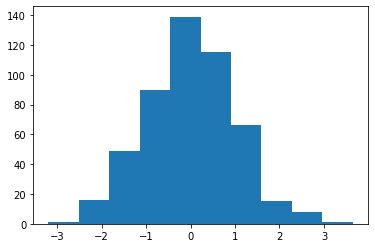

In [74]:
import matplotlib.pyplot as plt
plt.hist(z_group['Age'])

In [75]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [76]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,132.437324,103.184672,35,15066.122922
1,125.453175,93.384280,32,21102.861399
2,225.014303,55.029533,25,17287.848139
3,120.710759,95.048062,33,16129.378758
4,192.784990,24.646342,16,20958.700342
...,...,...,...,...
495,195.786914,54.064663,27,18881.109932
496,181.268338,94.975790,34,18611.291485
497,138.929960,58.472446,42,20741.499495
498,143.136651,13.187100,25,16583.315342


#OPERACIONES DIVERSAS MUY ÚTILES

In [77]:
# seleccionar la fila i-ésima
double_group.head(1) #ojo que al ser una agrupación, devuelve la primera fila de cada uno

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,132.437324,103.184672,35,15066.122922
1,Male,Middle Class,125.453175,93.384280,32,21102.861399
3,Male,Poor,120.710759,95.048062,33,16129.378758
4,Male,Rich,192.784990,24.646342,16,20958.700342
6,Female,Poor,189.808032,31.495853,40,14091.333785
7,Female,Middle Class,169.719069,106.419817,33,14784.645489


In [78]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
492,Female,Poor,220.611513,71.682142,34,15306.080084
493,Male,Middle Class,163.851278,67.697915,17,14719.319722
494,Female,Rich,146.410897,80.764813,37,22273.854026
497,Male,Rich,138.929960,58.472446,42,20741.499495
498,Male,Poor,143.136651,13.187100,25,16583.315342
499,Female,Middle Class,191.286179,68.009176,29,20776.796223


In [79]:
double_group.nth(32) #el elemento 32

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     173.829361  55.806758   31  16235.090762
       Poor             122.892708  58.410539   37  24033.678669
       Rich             130.825418  99.328291   45  20911.780769
Male   Middle Class     162.764238  32.200216   28  15347.639592
       Poor             152.885715  49.833680   11  18893.986144
       Rich             106.400547  34.913499   14  15887.789038

In [80]:
double_group.nth(82) #si en algunos grupos no hay tantos registros...

Height     Weight  Age        Income
Gender Economic Status                                          
Female Poor             158.702540  57.520553   18  20535.527319
       Rich             169.148269  66.438429   47  18666.438068

In [81]:
data_sorted = data.sort_values(['Age', 'Income'])
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
97,Female,Middle Class,133.990122,24.409980,-7,19918.180060
47,Male,Poor,188.321992,68.084362,-2,22842.403092
48,Female,Rich,176.359820,86.599089,0,16868.364476
34,Male,Rich,135.425326,84.846234,0,17335.577769
379,Male,Poor,168.959479,67.061896,1,14590.040939


In [82]:
age_grouped = data_sorted.groupby('Gender')
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
97,Female,Middle Class,133.990122,24.409980,-7,19918.180060
47,Male,Poor,188.321992,68.084362,-2,22842.403092


In [83]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
387,Female,Poor,133.923413,64.008988,61,18479.998784
68,Male,Middle Class,156.228580,67.963513,65,22810.027660


In [84]:
#from sklearn.model_selection import train_test_split en lugar de from sklearn.cross_validation import train_test_split

# es necesario usar .astype(int) al representar el vector de variables booleanas 

# CONJUNTO DE ENTRENAMIENTO Y CONJUNTO DE TESTING

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/customer-churn-model/Customer%20Churn%20Model.txt'
data = pd.read_csv(url)

len(data)

3333

## Dividir usando la distribución normal

(array([  3.,  27., 138., 457., 900., 979., 607., 181.,  37.,   4.]),
 array([-3.99932183, -3.22588264, -2.45244346, -1.67900428, -0.90556509,
        -0.13212591,  0.64131327,  1.41475246,  2.18819164,  2.96163082,
         3.73507001]),
 <a list of 10 Patch objects>)

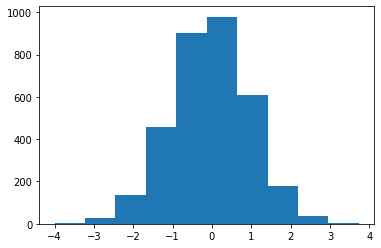

In [92]:
a = np.random.randn(len(data))
plt.hist(a)

In [113]:
check = (a < 0.80) # configura un array con True si se cumple la condición
print(check.sum() / len(a)) # comprobamos que es el 80% de los datos


0.7983798379837984


In [112]:
training = data[check] #en training los del True (80%)
testing = data[~check] #en Testing los del False (20%)
print(len(testing) / len(data))
print(len(training) / len(data))

0.21782178217821782
0.7821782178217822


## Con la librería sklearn

In [116]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)
len(train) / len(data)

0.7998799879987999

## Usando una función de shuffle

In [134]:
import numpy as np
import sklearn

data = sklearn.utils.shuffle(data)

cut_id = int(0.80 * len(data))

train_data = data[:cut_id]
test_data = data[(cut_id+1):]

0.1998199819981998